# Visualizing Pixar's Rollercoaster

This guided project intended to provide some practice with more advanced data visualization features relative to the previous recent_grads project. The dataset for this project contain information about Pixar movies including the release year, critic scores, and money grossed.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pixar_movies = pd.read_csv('PixarMovies.csv')
print("Rows: " + str(pixar_movies.shape[0]))
print("Columns: " + str(pixar_movies.shape[1]))
pixar_movies

Rows: 15
Columns: 16


,Year Released,Movie,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Domestic Gross,Adjusted Domestic Gross,International Gross,Domestic %,International %,Production Budget,Oscars Nominated,Oscars Won
0,1995,Toy Story,81,100,8.3,92,29.14,362.0,191.8,356.21,170.2,52.98%,47.02%,30,3.0,0.0
1,1998,A Bug's Life,96,92,7.2,77,33.26,363.4,162.8,277.18,200.6,44.80%,55.20%,45,1.0,0.0
2,1999,Toy Story 2,92,100,7.9,88,57.39,485.0,245.9,388.43,239.2,50.70%,49.32%,90,1.0,0.0
3,2001,"Monsters, Inc.",90,96,8.1,78,62.58,528.8,255.9,366.12,272.9,48.39%,51.61%,115,3.0,1.0
4,2003,Finding Nemo,104,99,8.2,90,70.25,895.6,339.7,457.46,555.9,37.93%,62.07%,94,4.0,1.0
5,2004,The Incredibles,115,97,8.0,90,70.47,631.4,261.4,341.28,370.0,41.40%,58.60%,92,4.0,2.0
6,2006,Cars,116,74,7.2,73,60.12,462.0,244.1,302.59,217.9,52.84%,47.16%,70,2.0,0.0
7,2007,Ratatouille,111,96,8.0,96,47.00,623.7,206.4,243.65,417.3,33.09%,66.91%,150,5.0,1.0
8,2008,WALL-E,97,96,8.4,94,63.10,521.3,223.8,253.11,297.5,42.93%,57.07%,180,6.0,1.0
9,2009,Up,96,98,8.3,88,68.11,731.3,293.0,318.90,438.3,40.07%,59.93%,175,5.0,2.0


# Clean the Data
Within the dataset, there are a few problems with the formatting of the data. 

For instance, the percentage of domestic and international profits are currently strings with percent signs. These will need to be cleared and their data type will need to be switched to float. 

In [6]:
# Convert domestic/intl percentage to floats
pixar_movies['Domestic %'] = pixar_movies['Domestic %'].str.rstrip('%').astype(float)
pixar_movies['International %'] = pixar_movies['International %'].str.rstrip('%').astype(float)

# Normalize the IMDB Scores
pixar_movies['IMDB Score'] = pixar_movies['IMDB Score'] * 10

# Use the movie names as the index
pixar_movies.set_index(pixar_movies["Movie"], inplace=True)

pixar_movies

,Year Released,Movie,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Domestic Gross,Adjusted Domestic Gross,International Gross,Domestic %,International %,Production Budget,Oscars Nominated,Oscars Won
Movie,,,,,,,,,,,,,,,,
Toy Story,1995,Toy Story,81,100,83.0,92,29.14,362.0,191.8,356.21,170.2,52.98,47.02,30,3.0,0.0
A Bug's Life,1998,A Bug's Life,96,92,72.0,77,33.26,363.4,162.8,277.18,200.6,44.80,55.20,45,1.0,0.0
Toy Story 2,1999,Toy Story 2,92,100,79.0,88,57.39,485.0,245.9,388.43,239.2,50.70,49.32,90,1.0,0.0
"Monsters, Inc.",2001,"Monsters, Inc.",90,96,81.0,78,62.58,528.8,255.9,366.12,272.9,48.39,51.61,115,3.0,1.0
Finding Nemo,2003,Finding Nemo,104,99,82.0,90,70.25,895.6,339.7,457.46,555.9,37.93,62.07,94,4.0,1.0
The Incredibles,2004,The Incredibles,115,97,80.0,90,70.47,631.4,261.4,341.28,370.0,41.40,58.60,92,4.0,2.0
Cars,2006,Cars,116,74,72.0,73,60.12,462.0,244.1,302.59,217.9,52.84,47.16,70,2.0,0.0
Ratatouille,2007,Ratatouille,111,96,80.0,96,47.00,623.7,206.4,243.65,417.3,33.09,66.91,150,5.0,1.0
WALL-E,2008,WALL-E,97,96,84.0,94,63.10,521.3,223.8,253.11,297.5,42.93,57.07,180,6.0,1.0


TypeError: unorderable types: numpy.ndarray() < str()

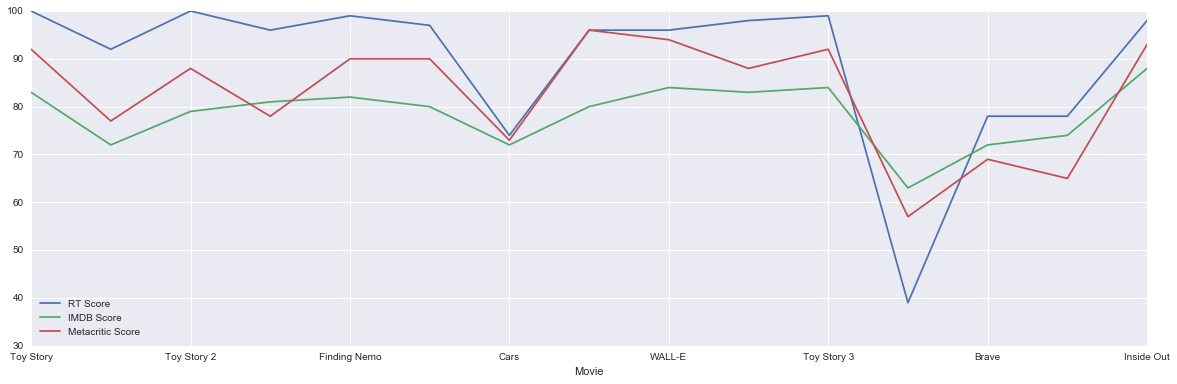

In [27]:
critic_reviews = pixar_movies[['RT Score', 'IMDB Score', 'Metacritic Score']]
ax = critic_reviews.plot(figsize=(20,6))
plt.show()


Note: In this guided project, we practiced using pandas' matplotlib wrapper to create plots. While the wrapper makes it simpler to create a graph it lacks the same customization and control that comes with using matplotlib directly. Using the simpler method here left us without all the xtick labels and without an easy way to see which movie was responsible for the huge drop in critic scores.

It was Cars 2.

While the graph above was lacking some important information, it still did reveal some interesting things. For instance, the three lines move across the graph in lanes with Rotten Tomato scores consistently being the most favourable to the Pixar movies. To explore this further we will use pandas to create a box and whisker plot. 

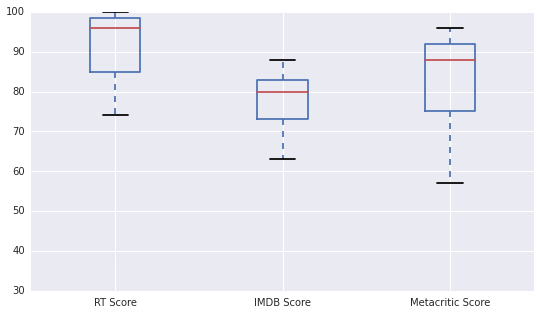

In [7]:
critics_reviews.plot(kind='box', figsize=(9,5))
plt.show()

Another interesting area we can explore with this Pixar dataset is the balance between international and domestic revenues for each film. To do this, we will create a stacked bar plot using pandas. We will also count which movies made more internationally/domestically and, finally, what percentage of Pixar's overall revenue has come from home and abroad.

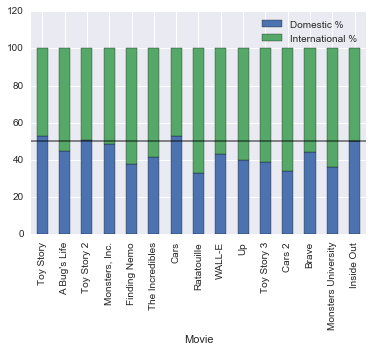

Domestic: 4
International: 11

Domestic share for all movies: 46.34
International share for all movies:60.8


In [35]:
revenue_proportions = pixar_movies[['Domestic %', 'International %']]
ax = revenue_proportions.plot(kind='bar', stacked=True)
ax.axhline(y=50, alpha=0.5, c='k')
plt.show()

domestic = 0
international = 0
domestic_sum = 0
international_sum = 0
for index, row in revenue_proportions.iterrows():
    # How many movies generated more revenue domestically?
    if row['Domestic %'] > row['International %']:
        domestic += 1
    elif row['International %'] > row['Domestic %']:
        international += 1
    
     # What is the total share over all Pixar movies in the dataset?
    domestic_sum += row['Domestic %']
    international_sum += row['International %']
        
    
print('Domestic: ' + str(domestic))
print("International: " + str(international) + '\n')
print('Domestic share for all movies: ' + str(round(domestic_sum/14,2)))
print('International share for all movies:' + str(round(international_sum/14,2)))
    

The black line is draw at 50%. Four movies grossed more domestically and overall Pixar's domestic gross is 46% of their total revenue. 